## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

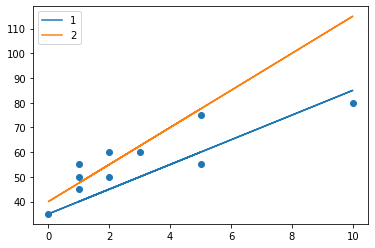

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

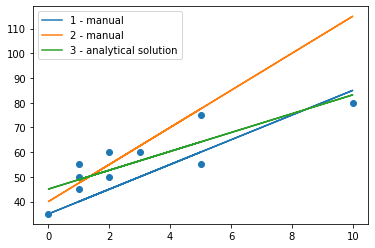

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [106]:
n = X.shape[1]
alpha = 9e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(200):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.09        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [10.72 34.43], MSE = 3047.75
Iteration #10: W_new = [ 2276.33841618 12409.86650201], MSE = 796432997.11
Iteration #20: W_new = [ 262978.48744009 1450044.52016754], MSE = 14701686451429.96
Iteration #30: W_new = [ 6241364.00818316 34418831.70511381], MSE = 1.1394319142061656e+16
Iteration #40: W_new = [2.68067569e+07 1.47830133e+08], MSE = 2.95877572722467e+17
Iteration #50: W_new = [17974890.99340411 99125318.78568748], MSE = 1.9286985343530672e+17
Iteration #60: W_new = [1548373.20234155 8538524.82755655], MSE = 2157273408111675.0
Iteration #70: W_new = [13147.39827568 72262.4199961 ], MSE = 245728807162.95
Iteration #80: W_new = [52.01241529 44.55961881], MSE = 133904.39
Iteration #90: W_new = [44.76446078  3.86739348], MSE = 44.01
Iteration #100: W_new = [44.84630987  3.85170275], MSE = 43.99
Iteration #110: W_new = [44.90104023  3.84177824], MSE = 43.98
Iteration #120: W_

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [129]:
n = X.shape[1]
alpha = 9e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(200):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis = 1))
    #W_pred = W
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.09        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [10.72 34.43], MSE = 3047.75
Iteration #10: W_new = [ 2276.33841618 12409.86650201], MSE = 796432997.11
Iteration #20: W_new = [ 262978.48744009 1450044.52016754], MSE = 14701686451429.96
Iteration #30: W_new = [ 6241364.00818316 34418831.70511381], MSE = 1.1394319142061656e+16
Iteration #40: W_new = [2.68067569e+07 1.47830133e+08], MSE = 2.95877572722467e+17
Iteration #50: W_new = [17974890.99340411 99125318.78568748], MSE = 1.9286985343530672e+17
Iteration #60: W_new = [1548373.20234155 8538524.82755655], MSE = 2157273408111675.0
Iteration #70: W_new = [13147.39827568 72262.4199961 ], MSE = 245728807162.95
Iteration #80: W_new = [52.01241529 44.55961881], MSE = 133904.39
Iteration #90: W_new = [44.76446078  3.86739348], MSE = 44.01
Iteration #100: W_new = [44.84630987  3.85170275], MSE = 43.99
Iteration #110: W_new = [44.90104023  3.84177824], MSE = 43.98
Iteration #120: W_

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [154]:
n = X.shape[1]
alpha = 7e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

# Ошибка на предыдущем и на текущем шаге
err_old = 100
err = 0

# критерий сходимости (разница ошибок, при которой алгоритм останавливается)
min_err = 1e-4

# счетчик итераций
iter_num = 0
# максимальное число итераций
max_iter = 200

while ( np.linalg.norm(err - err_old) > min_err) and (iter_num < max_iter):
    y_pred = np.dot(W, X)    
    err_old = err
    err = calc_mse(y, y_pred)
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis = 1))
    
    iter_num += 1
    
    if iter_num % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{iter_num}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.07        
Initial weights = [1.  0.5] 

Iteration #10: W_new = [ -61.74739976 -461.29170849], MSE = 1880470.95
Iteration #20: W_new = [ -656.95633884 -3799.43696088], MSE = 172642603.33
Iteration #30: W_new = [ -888.23348518 -5103.37028257], MSE = 445840704.87
Iteration #40: W_new = [-131.83078336 -947.45085347], MSE = 22983367.41
Iteration #50: W_new = [ 38.81500366 -15.11679112], MSE = 14937.95
Iteration #60: W_new = [43.23817011  4.11135069], MSE = 45.72
Iteration #70: W_new = [43.80248706  4.04098155], MSE = 44.77
Iteration #80: W_new = [44.15943609  3.97625672], MSE = 44.38
Iteration #90: W_new = [44.39505787  3.93353034], MSE = 44.19
Iteration #100: W_new = [44.55526297  3.90447962], MSE = 44.1
Iteration #110: W_new = [44.66715058  3.88419052], MSE = 44.05
Iteration #120: W_new = [44.74721554  3.86967197], MSE = 44.02
Iteration #130: W_new = [44.80578521  3.85905127], MSE = 44.0
Iteration #140: W_new = [44.84949528  3.85112512], M

4. Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.

**Выводы:** 
\
После нескольких подборов скорости обучения и количества итераций, а так же изменяя стартовые веса по результатам обучения можно сделать вывод, что при скорости обучения 9e-2 мы выходим на стабильную ошибку MSE = 43.97 уже на 130 шаге.
Смущает только то, что в самом начале обучения ошибка очень большая при скорости обучения более 7e-2. Если скорость обучения поставить 7e-2 и менее, то сходимость будет более стабильная, но при этом MSE равную 43.97 мы получим только на 250 шаге и более.
\
Можно сказать, что качество модели может повышаться и понижаться как с разными коэфициентами скорости обучения так и с количеством итераций. Все зависит от начальных параметров модели и далее уже смотрим на ее поведение. Исходя из этого нужно настраивать параметры скорости обучения и количество итераций.